In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from qiboconnection.api import API

from qililab import build_platform

PATH = os.getcwd()
os.environ["DATA"] = f"{PATH}/data"
os.environ["RUNCARDS"] = f"{PATH}/runcards"

In [2]:
"""Load the platform 'sauron' from the runcard."""
platform = build_platform(name="sauron_vna")

[qililab] [0.16.1|INFO|2023-03-22 11:14:03]: Building platform
INFO:qililab.config.config:Building platform


In [3]:
platform.connect()

[qililab] [0.16.1|INFO|2023-03-22 11:14:04]: Connecting to instrument keysight_e5080b_controller.
INFO:qililab.config.config:Connecting to instrument keysight_e5080b_controller.
[qililab] [0.16.1|INFO|2023-03-22 11:14:04]: Reset instrument VNA.
INFO:qililab.config.config:Reset instrument VNA.
[qililab] [0.16.1|INFO|2023-03-22 11:14:04]: Connected to the instruments
INFO:qililab.config.config:Connected to the instruments


In [4]:
vna_e5080b = platform.instruments.elements[0]

In [5]:
type(vna_e5080b)

qililab.instruments.keysight.e5080b_vna.E5080B

In [6]:
vna_e5080b.read()

'+1\n'

Get & set parameters

In [6]:
vna_e5080b.power = -20
vna_e5080b.power

-20

In [7]:
vna_e5080b.scattering_parameter = "S21"
vna_e5080b.scattering_parameter

<VNAScatteringParameters.S21: 'S21'>

In [8]:
vna_e5080b.if_bandwidth = 100
vna_e5080b.if_bandwidth

100

In [26]:
vna_e5080b.averaging_enabled = False
vna_e5080b.averaging_enabled

False

In [29]:
vna_e5080b.number_averages = 1
vna_e5080b.number_averages

1

In [9]:
vna_e5080b.number_points = 200
vna_e5080b.number_points

200

In [12]:
vna_e5080b.sweep_mode = "cont"
vna_e5080b.sweep_mode

<VNASweepModes.CONT: 'cont'>

In [13]:
npoints = 200
jj = 9
f0s = [
    6.061445e9,
    6.152293e9,
    6.23766e9,
    6.31578e9,
    6.403124e9,
    6.485132e9,
    6.580649e9,
    6.653112e9,
    6.732787e9,
    6.828278e9,
]
fspan = [2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6, 2e6]
vna_e5080b.frequency_center = 8e9
vna_e5080b.frequency_span = 2e9
freq = np.linspace(-0.5, 0.5, npoints) * fspan[jj] + f0s[jj]

In [14]:
results = vna_e5080b.read_tracedata()

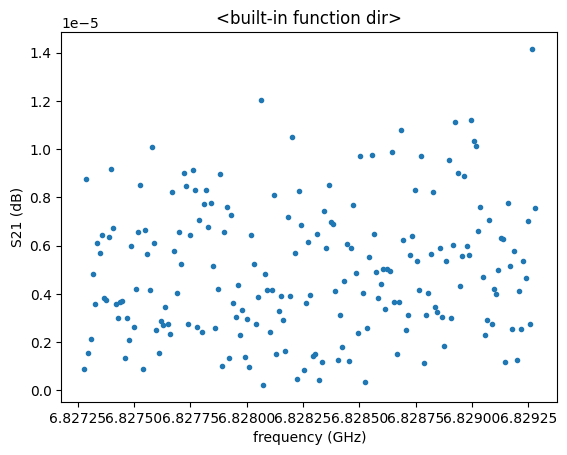

In [15]:
### Single trace ###
# vna.release() #That's how get_trace should be used. It maintains the data.

# dir = save_data(f'single_trace_res{jj}',np.real(results), np.imag(results), freq, [])
# print(dir)

plt.plot(freq * 1e-9, np.abs(results), ".")
plt.title(dir)
plt.xlabel("frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.show()

In [ ]:
vna_e5080b.release()

In [19]:
vna_e5080b.get_frequencies()

array([7.00000000e+09, 7.01005005e+09, 7.02010061e+09, 7.03015066e+09,
       7.04020122e+09, 7.05025126e+09, 7.06030131e+09, 7.07035187e+09,
       7.08040192e+09, 7.09045248e+09, 7.10050253e+09, 7.11055258e+09,
       7.12060314e+09, 7.13065318e+09, 7.14070374e+09, 7.15075379e+09,
       7.16080384e+09, 7.17085440e+09, 7.18090445e+09, 7.19095501e+09,
       7.20100506e+09, 7.21105510e+09, 7.22110566e+09, 7.23115571e+09,
       7.24120627e+09, 7.25125632e+09, 7.26130637e+09, 7.27135693e+09,
       7.28140698e+09, 7.29145754e+09, 7.30150758e+09, 7.31155763e+09,
       7.32160819e+09, 7.33165824e+09, 7.34170829e+09, 7.35175885e+09,
       7.36180890e+09, 7.37185946e+09, 7.38190950e+09, 7.39195955e+09,
       7.40201011e+09, 7.41206016e+09, 7.42211072e+09, 7.43216077e+09,
       7.44221082e+09, 7.45226138e+09, 7.46231142e+09, 7.47236198e+09,
       7.48241203e+09, 7.49246208e+09, 7.50251264e+09, 7.51256269e+09,
       7.52261325e+09, 7.53266330e+09, 7.54271334e+09, 7.55276390e+09,
      

In [ ]:
vna_e5080b.average_clear()

In [ ]:
vna_e5080b.autoscale()

In [9]:
vna_e5080b.number_points = 1000

In [10]:
vna_e5080b.scattering_parameter = "S21"

In [11]:
vna_e5080b.autoscale()

In [12]:
vna_e5080b.output(arg="ON")

10

In [31]:
platform.close()

[qililab] [0.9.0|INFO|2022-10-22 10:33:49]: Closing instrument keysight_e5080b_controller.
INFO:qililab.config.config:Closing instrument keysight_e5080b_controller.
